In [1]:
import pyspark 
from pyspark.sql import SparkSession, DataFrame
from pyspark import SparkConf, SparkContext
import os
import re
import numpy as np
import time
from functools import reduce
import pyspark.sql.functions as F
import pyspark.sql.functions as f

from pyspark.sql.types import FloatType, StringType, IntegerType
from pyspark.sql.window import Window

Location_master = 'spark://linux:7077'
# Location_master = 'local'
try:
    sparkSession.stop()
except:
    pass
sparkSession = SparkSession \
    .builder \
    .master(Location_master)\
    .appName("Phan tich 2020") \
    .config("spark.some.config.option", "some-value") \
    .config("spark.executor.memory", "4g") \
    .config('spark.cores.max','4')\
    .getOrCreate()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use(
    'ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
data = sparkSession.read.csv("Diemthi2020.csv", header=True)
print(data.count())
data.printSchema()
data.show(5)

811448
root
 |-- SBD: string (nullable = true)
 |-- Toan: string (nullable = true)
 |-- Ngu_van: string (nullable = true)
 |-- Ngoai_ngu: string (nullable = true)
 |-- Vat_ly: string (nullable = true)
 |-- Hoa_hoc: string (nullable = true)
 |-- Sinh_hoc: string (nullable = true)
 |-- Lich_su: string (nullable = true)
 |-- Dia_ly: string (nullable = true)
 |-- GDCD: string (nullable = true)
 |-- Ma_cum: string (nullable = true)

+--------+----+-------+---------+------+-------+--------+-------+------+----+------+
|     SBD|Toan|Ngu_van|Ngoai_ngu|Vat_ly|Hoa_hoc|Sinh_hoc|Lich_su|Dia_ly|GDCD|Ma_cum|
+--------+----+-------+---------+------+-------+--------+-------+------+----+------+
|01000001| 7.0|    6.0|     null|  null|   null|    null|    8.0|  null|null|    01|
|01000002| 9.0|    6.0|      9.4|  7.25|   8.75|    7.25|   null|  null|null|    01|
|01000003| 8.8|    6.5|      6.0|  8.25|   8.75|    4.75|   null|  null|null|    01|
|01000004| 7.0|   null|      8.2|  null|    6.0|    null| 

In [4]:
data_all = data.withColumn('Toan', F.col('Toan').cast(FloatType()))
data_all = data_all.withColumn('Ngu_van', F.col('Ngu_van').cast(FloatType()))
data_all = data_all.withColumn('Ngoai_ngu', F.col('Ngoai_ngu').cast(FloatType()))
data_all = data_all.withColumn('Vat_ly', F.col('Vat_ly').cast(FloatType()))
data_all = data_all.withColumn('Hoa_hoc', F.col('Hoa_hoc').cast(FloatType()))
data_all = data_all.withColumn('Sinh_hoc', F.col('Sinh_hoc').cast(FloatType()))
data_all = data_all.withColumn('Lich_su', F.col('Lich_su').cast(FloatType()))
data_all = data_all.withColumn('Dia_ly', F.col('Dia_ly').cast(FloatType()))
data_all = data_all.withColumn('GDCD', F.col('GDCD').cast(FloatType()))

data_all.printSchema()

root
 |-- SBD: string (nullable = true)
 |-- Toan: float (nullable = true)
 |-- Ngu_van: float (nullable = true)
 |-- Ngoai_ngu: float (nullable = true)
 |-- Vat_ly: float (nullable = true)
 |-- Hoa_hoc: float (nullable = true)
 |-- Sinh_hoc: float (nullable = true)
 |-- Lich_su: float (nullable = true)
 |-- Dia_ly: float (nullable = true)
 |-- GDCD: float (nullable = true)
 |-- Ma_cum: string (nullable = true)



## Phân tích theo từng môn học

In [5]:
df = data_all.toPandas()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811448 entries, 0 to 811447
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SBD        811448 non-null  object 
 1   Toan       807976 non-null  float32
 2   Ngu_van    799437 non-null  float32
 3   Ngoai_ngu  724973 non-null  float32
 4   Vat_ly     269363 non-null  float32
 5   Hoa_hoc    271142 non-null  float32
 6   Sinh_hoc   266478 non-null  float32
 7   Lich_su    534985 non-null  float32
 8   Dia_ly     519979 non-null  float32
 9   GDCD       458589 non-null  float32
 10  Ma_cum     811448 non-null  object 
dtypes: float32(9), object(2)
memory usage: 40.2+ MB


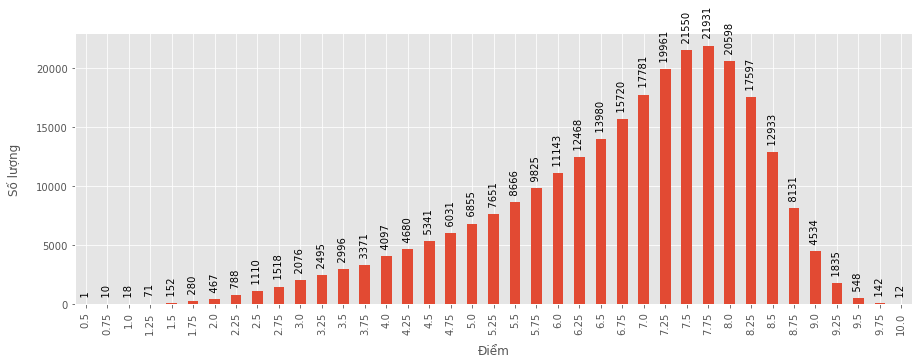

In [133]:
data_show = df['Vat_ly'].value_counts().sort_index(ascending=True)
plt.xlabel('Điểm', labelpad=10)
plt.ylabel('Số lượng', labelpad=15)
for index, value in enumerate(data_show.values):
    plt.text(index, value, '   ' + str(value), rotation = 90, 
             horizontalalignment='center', multialignment='center')
    
data_show.plot(kind='bar')
plt.savefig('data.png')

In [6]:
# sparkSession.stop()